('kd', 0.3141592653589793, 'ka', 0.021359807584207344, 'k2', 0.1)
L 1.0
rv 0.125
K 4.0
tau 0.625
no of b 0
actual vol 2.3864853865
mean na 4.96072
('kd', 0.12566370614359174, 'ka', 0.023785595022158504, 'k2', 0.1)
L 1.0
rv 0.05
K 10.0
tau 0.1
no of b 0
actual vol 1.66311514935
mean na 5.03174
('kd', 0.06283185307179587, 'ka', 0.029338844138485195, 'k2', 0.1)
L 1.0
rv 0.025
K 20.0
tau 0.025
no of b 0
actual vol 1.21339523652
mean na 4.99366
('kd', 0.031415926535897934, 'ka', 0.055038767877682165, 'k2', 0.1)
L 1.0
rv 0.0125
K 40.0
tau 0.00625
no of b 0
actual vol 1.11369318037
mean na 4.90794


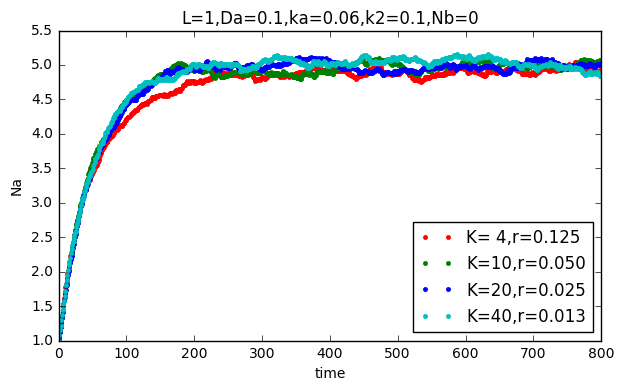

In [1]:
from ecell4 import *
import math
import numpy as np
import matplotlib.pyplot as plt

#verify the manual first order with auto first order and compare with zero order

Ks = [4]#,10,20,40]
clrs = ['r','g','b','c']
for K,clr in zip(Ks,clrs):
    duration = 800
    simrun =1

    dt = 1
    L=1.
    voxelr=L/(2*K)
    Da = 0.1
    Db = 0.
    D=Da+Db
    kd= 4.0*math.pi*D*2*voxelr
    kon = 0.02
    ka = kon/(1-(kon/kd))
    k2 = 0.1
    Nb0 = 0
    Na0=1
    V1 = L**3
    print('kd',kd,'ka', ka,'k2',k2)
    print 'L',L
    print 'rv',voxelr
    print 'K',L/(2*voxelr)
    print 'tau',(2*voxelr)**2/Da
    print 'no of b',Nb0
    rng = GSLRandomNumberGenerator()
    #rng.seed()
    
    def draw_time(w):
        k = k2/w.size()
        Ng = w.size() - w.num_voxels() # w.num_voxels_exact(Species("X"))
        p = k * Ng
        r = rng.uniform(0, 1)  #XXX: Update me
        tau = math.log(1./r)/p
        return w.t() + tau,Ng

    def do_reaction(w,Ng):
        na =w.num_molecules_exact(Species("A"))
        if ((Ng+na)!=w.size()):  print 'error',Ng+na,na, w.size()
        w.add_molecules(Species("A"), 1)   

    tt = np.arange(0,duration+1,dt)
    Na = np.zeros(len(tt))

    for i in range(simrun):
        with species_attributes():
            A | {'D': str(Da), 'radius':str(voxelr)}
            #B | {'D': str(Db), 'radius':str(voxelr)}

        with reaction_rules():
            A > ~A | kon

        model = get_model()
        f = spatiocyte.SpatiocyteFactory(voxelr)
        w = f.create_world()
        w.bind_to(model)
        w.add_molecules(Species("A"), Na0)
        w.add_molecules(Species("B"),Nb0)
        V = w.get_volume()        
        sim = f.create_simulator(w)
        T,Ng = draw_time(w)
        #print(T, sim.next_time())
        data = []
        index = 0
        time = tt[0]
        while sim.t() < duration:
            if sim.next_time() < T:          
                sim.step()
                if len(sim.last_reactions()) > 0:
                    T,Ng = draw_time(w)
            else:
                sim.step(T)
                do_reaction(w,Ng)
                T,Ng = draw_time(w)
            if (sim.t()>=time and index!=len(tt)):
                Na[index] += w.num_molecules_exact(Species("A"))
                index +=1
                if (index<len(tt)):
                    time = tt[index]
    print 'actual vol',V
    Na = Na/simrun
    print 'mean na',np.mean(Na[-50:])
    plt.plot(tt,Na,c=clr,linestyle='',marker='.',label='K={0:2d},r={1:0.3f}'.format(K,voxelr))
    plt.xlabel('time')
    plt.ylabel('Na')

plt.title("L={4:1.0f},Da={0:0.1f},ka={1:0.2f},k2={3:0.1f},Nb={5:1.0f}".format(Da,ka,kd,k2,L,Nb0))
fig = plt.gcf()
fig.set_size_inches(7,4)
plt.legend(loc='best')
plt.savefig("figure/1st_order_production_degradation_Sturrock_rxn.png",format='png',dpi=100)
plt.show()



In [15]:
kon =0.02
k2 = 10
K=40
kratio = kon/k2
vr=L/(2*K)
w = spatiocyte.SpatiocyteWorld(ones()*1.,vr)
print w.size(),1/kratio
V = w.get_volume()
print 1./(kratio+(1./w.size()))
print 1.11369318037**(1./3)

100800 500.0
497.532082922
1.03654585692
